## Table of Contents: <a id ="title"></a>
* [Imports](#imports)
* [Fraud](#Fraud)
* [Transaction_Category](#Transaction_Category)

# EDA Notebook

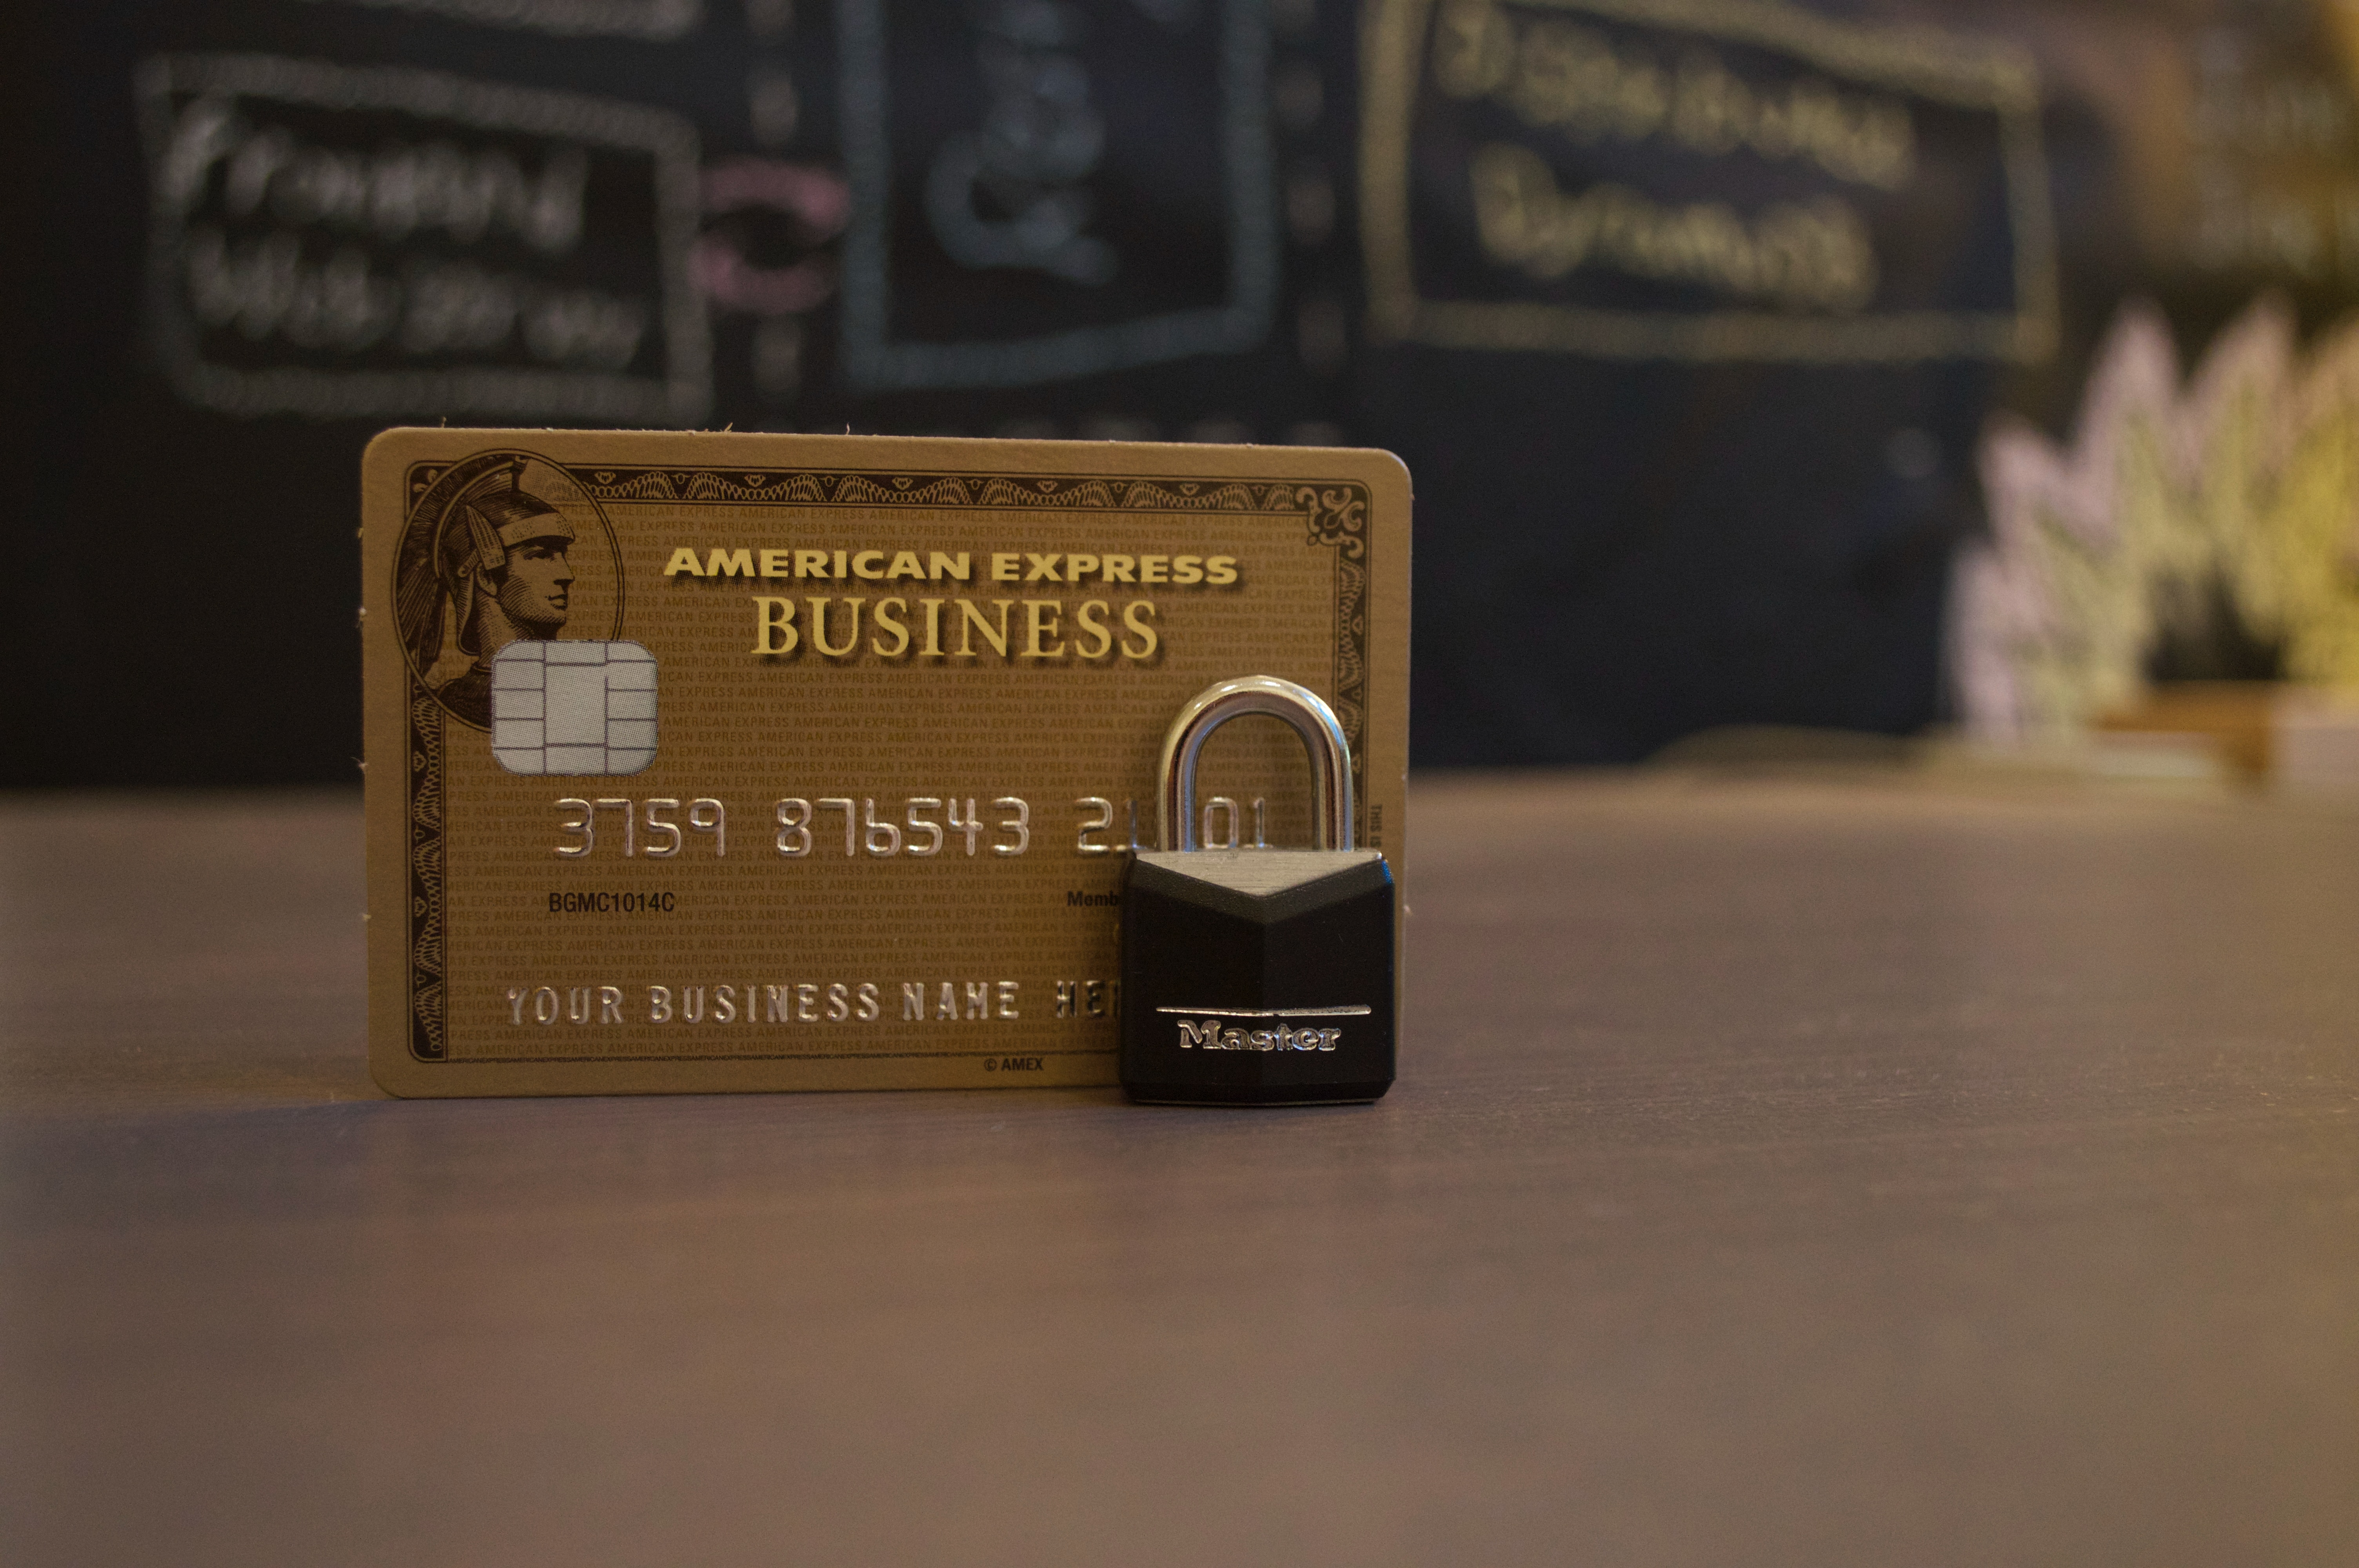
# This [Data](https://www.kaggle.com/datasets/kartik2112/fraud-detection) was found on Kaggle for Credit Card Fraud.

### [Imports](#title) <a id ="imports"><a>
<hr style="border:2px solid blue">

In [1]:
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#pd.options.display.max_columns = None

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Data/TrainTestCombine.csv')

In [3]:
data = data.drop(columns= 'Unnamed: 0')
data = data.drop(columns='Unnamed: 0.1')

In [4]:
display(data.head())
display(data.describe())
display(data.columns)
display(pd.isna(data).sum())

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ...      lat  \
0   Elliott      M            351 Darlene Green    Columbia  ...  33.9659   
1  Williams      F             3638 Marsh Union     Altonah  ...  40.3207   
2     Lopez      F         9333 Valentine Point    Bellmore  ...  40.6729   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...  28.5697   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...  44.2529   

       long  city_pop                     job         dob  \
0  -80.9355    333497     Mechanical engineer  1968-03-19   
1 -110.4360       302  Sales professional, IT  1990-01-17   
2  -73.5365     34496       Librarian, public  1970-10-21   
3  -80.8191     54767            Set designer  1987-07-25   
4  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03  
std    3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01  7.199217e-02  
min    2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02  0.000000e+00  
25%    7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01  0.000000e+00  
50%    2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01  0.000000e+00  
75%    2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01  0.000000e+00  
max    2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01  1.000000e+00

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# <h3 align="center"><span style="color:Red">Data Dictionary</span></h3>

| Variable                | Definition                                         | Key                          |
|-------------------------|----------------------------------------------------|------------------------------|
| trans_date_trans_time   | Date and time of the transaction                   |                              |
| cc_num                  | Credit card number used for the transaction        |                              |
| merchant                | Merchant where the transaction took place          |                              |
| category                | Category of the purchase                           |                              |
| amt                     | Amount of money involved in the transaction        |                              |
| first                   | First name of the cardholder                       |                              |
| last                    | Last name of the cardholder                        |                              |
| gender                  | Gender of the cardholder                           | M: Male, F: Female           |
| street                  | Street address of the cardholder                   |                              |
| city                    | City of the cardholder                             |                              |
| state                   | State of the cardholder                            |                              |
| zip                     | ZIP code of the cardholder                         |                              |
| lat                     | Latitude of the cardholder's address               |                              |
| long                    | Longitude of the cardholder's address              |                              |
| city_pop                | Population of the city where the cardholder lives  |                              |
| job                     | Occupation of the cardholder                       |                              |
| dob                     | Date of birth of the cardholder                    |                              |
| trans_num               | Unique identifier for the transaction              |                              |
| unix_time               | Unix time when the transaction occurred            |                              |
| merch_lat               | Latitude of the merchant's location                |                              |
| merch_long              | Longitude of the merchant's location               |                              |
| is_fraud                | Indicator of whether the transaction was fraudulent| 1: Fraudulent, 0: Not fraudulent |

### [Fraud](#title) <a id ="Fraud"><a>
<hr style="border:2px solid blue">

In this section we are going to take a look at the is_fraud column and see how balanced or inbalanced this is

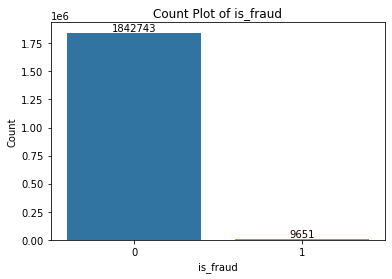

In [5]:
ax = sns.countplot(x='is_fraud', data=data)
plt.title('Count Plot of is_fraud')
plt.xlabel('is_fraud')
plt.ylabel('Count')

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Reminder 0 is not fraud and 1 is fraud

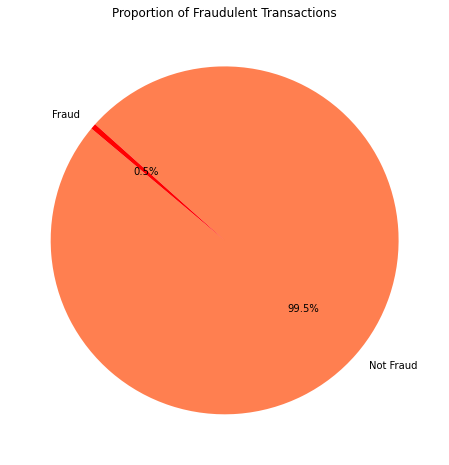

In [6]:
# Calculating the proportion of fraudulent transactions
fraud_counts = data['is_fraud'].value_counts()

# Plotting the pie chart for fraud analysis
plt.figure(figsize=(8,8))
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=140, colors=['coral', 'red'])
plt.title('Proportion of Fraudulent Transactions')
plt.show()

Both of these graphs show the distribution of fraud and non-fraudulent transactions in the dataset the pie chart does show a clearer visual of how prevalent fraud is relative to regular transactions.

In [7]:
print('Not Fraud:', round(data['is_fraud'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Fraud:', round(data['is_fraud'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Not Fraud: 99.48 % of the dataset
Fraud: 0.52 % of the dataset


This distribution indicates a highly imbalanced dataset where the majority of transactions are genuine and a small fraction are fraudulent. This will cause an issue when I go to model it, So I will need to tune that up.

### [Transaction_Category](#title) <a id ="Transaction_Category"><a>
<hr style="border:2px solid blue">

In [8]:
data['category'].value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

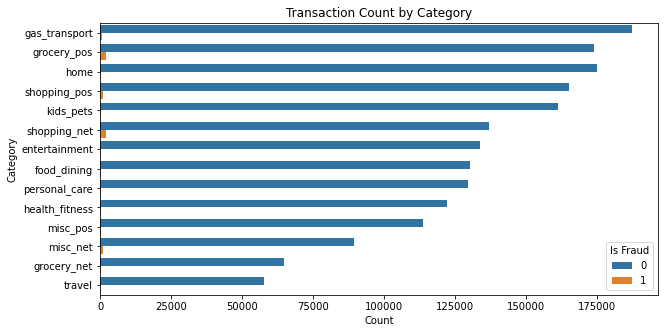

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, y='category', hue='is_fraud', order=data['category'].value_counts().index)
plt.title('Transaction Count by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.legend(title='Is Fraud')
plt.show()

This gives us a breakdown of the number of transactions by category and is also showing us non-fraud and fraud. in hopes it will show us which categories are more prone to fraud.

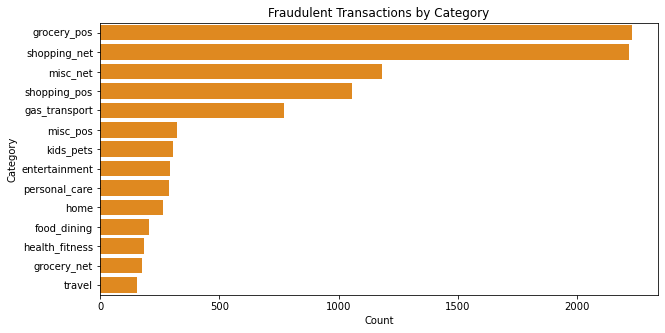

In [10]:
fraud_data = data[data['is_fraud'] == 1]
plt.figure(figsize=(10, 5))
sns.countplot(data=fraud_data, y='category', order = fraud_data['category'].value_counts().index, color='darkorange')
plt.title('Fraudulent Transactions by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

This more zoomed-in plot focuses specifically on fraudulent transactions and shows the distribution of fraud across different categories. which might mislead you to the main reasons for fraud as these all have different amounts of purchases.

In [11]:
fraud_data['category'].value_counts()

grocery_pos       2228
shopping_net      2219
misc_net          1182
shopping_pos      1056
gas_transport      772
misc_pos           322
kids_pets          304
entertainment      292
personal_care      290
home               265
food_dining        205
health_fitness     185
grocery_net        175
travel             156
Name: category, dtype: int64

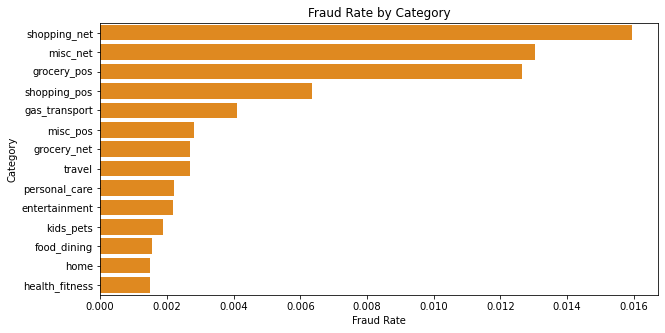

In [12]:
# Calculate the total number of transactions per category
total_transactions = data['category'].value_counts()

# Calculate the number of fraudulent transactions per category
fraud_transactions = data[data['is_fraud'] == 1]['category'].value_counts()

# Divide the number of fraudulent transactions by the total number of transactions for each category
# Sort the result in descending order to get the categories with the highest fraud rate first
fraud_rate = (fraud_transactions / total_transactions).sort_values(ascending=False)

fraud_rate_df = fraud_rate.reset_index().rename(columns={'index': 'Category', 'category': 'Fraud Rate'})
plt.figure(figsize=(10, 5))

sns.barplot(data=fraud_rate_df, y='Category', x='Fraud Rate', color='darkorange')

plt.title('Fraud Rate by Category')
plt.xlabel('Fraud Rate')
plt.ylabel('Category')

plt.show()

This bar graph shows us the correct fraud rate showing that a lot of the issues are in Shopping online, Miscellaneous online shopping, and at the grocery pos system. 

In [13]:
#making a new column for graph buidling 
data['trans_hour'] = pd.to_datetime(data['trans_date_trans_time']).dt.hour
data['trans_day'] = pd.to_datetime(data['trans_date_trans_time']).dt.dayofweek

In [14]:
data.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ... city_pop  \
0   Elliott      M            351 Darlene Green    Columbia  ...   333497   
1  Williams      F             3638 Marsh Union     Altonah  ...      302   
2     Lopez      F         9333 Valentine Point    Bellmore  ...    34496   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...    54767   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...     1126   

                      job         dob                         trans_num  \
0     Mechanical engineer  1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3   
1  Sales professional, IT  1990-01-17  324cc204407e99f51b0d6ca0055005e7   
2       Librarian, public  1970-10-21  c81755dbbbea9d5c77f094348a7579be   
3            Set designer  1987-07-25  2159175b9efe66dc301f149d3d5abf8c   
4      Furniture designer  1955-07-06  57ff021bd3f328f8738bb535c302a31b   

    unix_time  merch_lat  merch_long is_fraud  trans_hour  trans_day  
0  1371816865  33.986391  -81.200714        0          12          6  
1  1371816873  39.450498 -109.960431        0          12          6  
2  1371816893  40.495810  -74.196111        0          12          6  
3  1371816915  28.812398  -80.883061        0          12          6  
4  1371816917  44.959148  -85.884734        0          12          6  

[5 rows x 24 columns]

In [15]:
data['trans_day'].value_counts()

0    369418
6    343677
1    270340
5    263227
4    215078
3    206741
2    183913
Name: trans_day, dtype: int64

* 0 is equal to Monday
* 1 is equal to Tuesday
* 2 is equal to Wednesday
* 3 is equal to Thursday
* 4 is equal to Friday
* 5 is equal to Saturday
* 6 is equal to Sunday

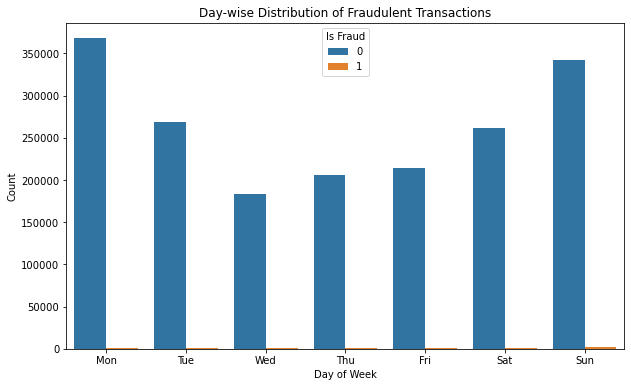

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_day', hue='is_fraud', data=data)
plt.title('Day-wise Distribution of Fraudulent Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Is Fraud')
plt.show()

This is showing the distribution of both fraudulent and non-fraudulent transactions across different days of the week.

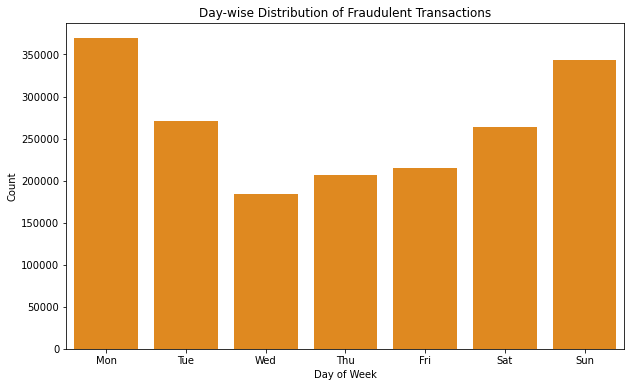

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_day', data=data, color='darkorange') 
plt.title('Day-wise Distribution of Fraudulent Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Shows the general activity pattern throughout the week

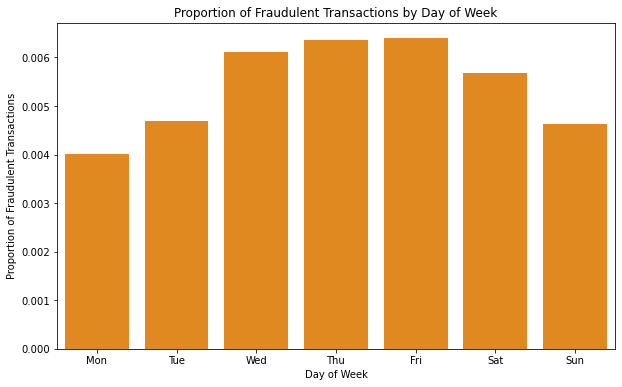

In [18]:
# Count the total number of transactions for each day
total_transactions_per_day = data['trans_day'].value_counts().sort_index()

# Filter the dataset for only fraudulent transactions
fraud_transactions = data[data['is_fraud'] == True]

# Count the number of fraudulent transactions for each day
fraud_transactions_per_day = fraud_transactions['trans_day'].value_counts().sort_index()

# Calculate the proportion of fraudulent transactions by day
fraud_proportion_per_day = fraud_transactions_per_day / total_transactions_per_day

# Now, create the bar plot with the proportion data
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_proportion_per_day.index, y=fraud_proportion_per_day.values, color='darkorange')
plt.title('Proportion of Fraudulent Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Proportion of Fraudulent Transactions')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Proportion of transactions that are fraudulent for each day of the week. This helps in identifying if there are specific days when fraud rates are unusually high.

<AxesSubplot:>

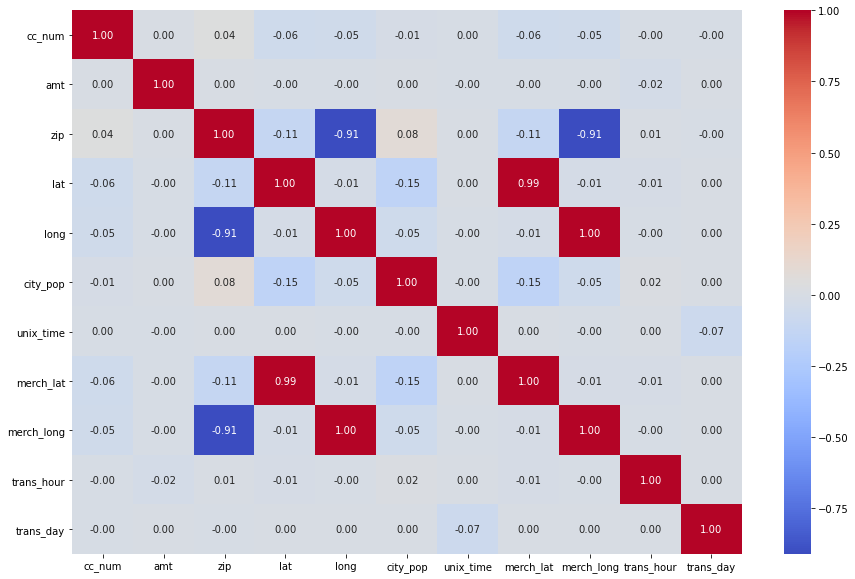

In [19]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(data.drop(['is_fraud'], axis = 1).corr(), 
            annot = True, cmap='coolwarm' , fmt=".2f")

Heatmap showing the correlation coefficients between different variables in the dataset, excluding the 'is_fraud' variable.

Descriptive Statistics for Fraudulent Transaction Amounts:
count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64


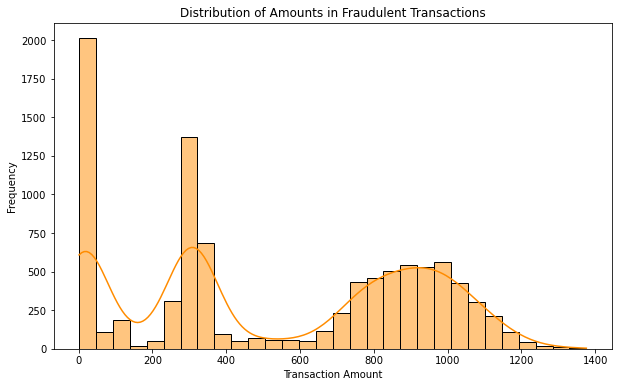

In [20]:
# Filter the data to include only fraudulent transactions
fraud_data = data[data['is_fraud'] == 1]

# Descriptive statistics for transaction amounts in fraudulent transactions
stats = fraud_data['amt'].describe()
print("Descriptive Statistics for Fraudulent Transaction Amounts:")
print(stats)

# Create a histogram for the amount spent in fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data['amt'], bins=30, kde=True, color='darkorange')
plt.title('Distribution of Amounts in Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

I'd like to give a little break down to what those numbers above the graph show
Descriptive Statistics for Fraudulent Transaction Amounts:
* count       9651.000000 - Represents the total number of fraudulent transactions

* mean        530.661412 - The average (or mean) transaction amount for fraudulent transactions is approximately 530.66

* std         391.028873 - The standard deviation is about 391.03

* min         1.060000 -   The smallest transaction amount recorded in the fraudulent transactions is 1.06

* 25%         240.075000 - 25% of the fraudulent transactions have amounts less than or equal to 240.08.

* Median(50%) 390.000000 - The median transaction amount is 390.00. This splits the dataset into two equal halves, with half of the transactions having amounts less than 390 and the other half having amounts greater.

* 75%         902.365000 - 75% of the fraudulent transactions have amounts that are less than or equal to 902.37

* Maximum     1376.040000 - The highest transaction amount in the fraudulent transactions is 1,376.04. This is the largest amount recorded in your dataset for a fraudulent transaction.

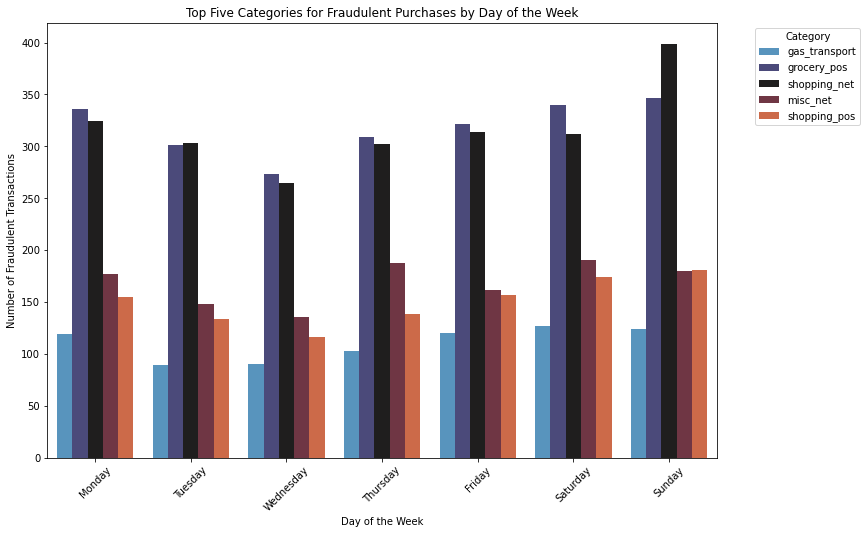

In [21]:
# Map the 'trans_day' numerical values to day names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['day_name'] = data['trans_day'].map(day_mapping)

# Filter the dataset for only fraudulent transactions
fraud_data = data[data['is_fraud'] == 1]

# Group the data by day of the week and category, then count the number of fraudulent transactions
fraud_by_day_category = fraud_data.groupby(['day_name', 'category']).size().reset_index(name='count')

# Sort and keep top 5 categories for each day
top_fraud_by_day_category = fraud_by_day_category.groupby('day_name').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Sorting the days of the week in order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top_fraud_by_day_category['day_name'] = pd.Categorical(top_fraud_by_day_category['day_name'], categories=ordered_days, ordered=True)
top_fraud_by_day_category = top_fraud_by_day_category.sort_values('day_name')

# Create a bar plot with a distinct color palette
plt.figure(figsize=(12, 8))
sns.barplot(x='day_name', y='count', hue='category', data=top_fraud_by_day_category, palette='icefire')

plt.title('Top Five Categories for Fraudulent Purchases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraudulent Transactions')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

This give's us a clear view on the effects that online shoping and grocery shopping have.